In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder



In [161]:
# 1. Aquisição e leitura dos dados
data = pd.read_csv('vinhos.csv')

In [162]:
data

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,tinto
1,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,6,tinto
2,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7,tinto
3,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,tinto
4,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6.6,0.310,0.07,1.5,0.033,55.0,144.0,0.99208,3.16,0.42,10.0,5,branco
2996,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6,branco
2997,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6,branco
2998,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7,branco


In [163]:
# 2. Análise exploratória
# Examine as principais características da base de dados, como estatísticas descritivas e gráficos.

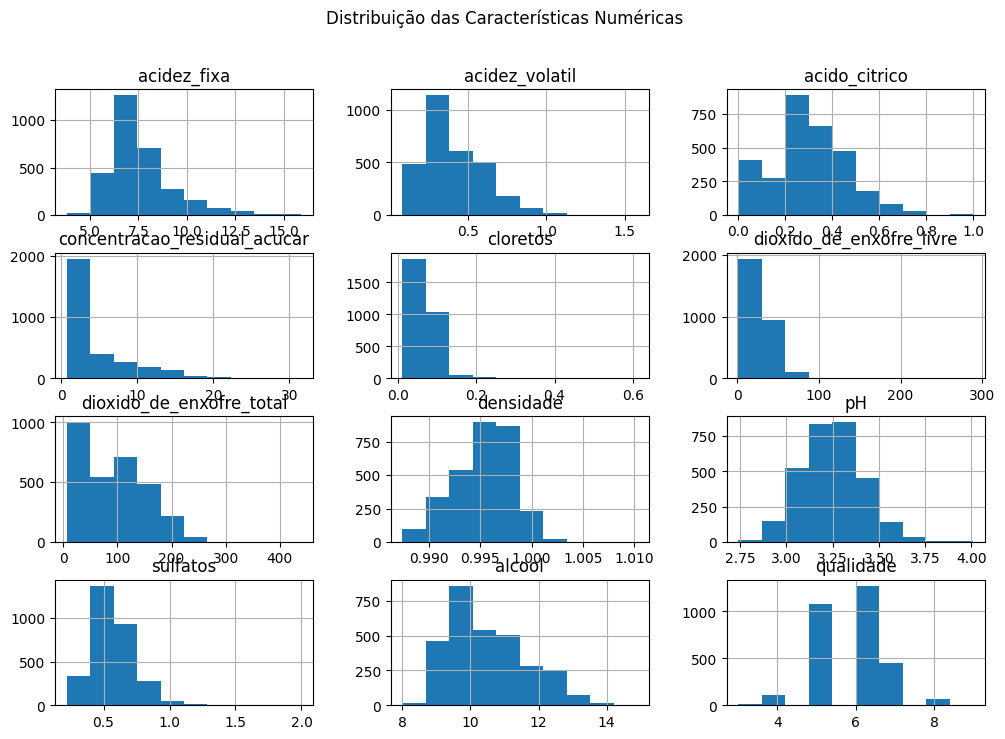

In [164]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(12, 8))
plt.suptitle("Distribuição das Características Numéricas")
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

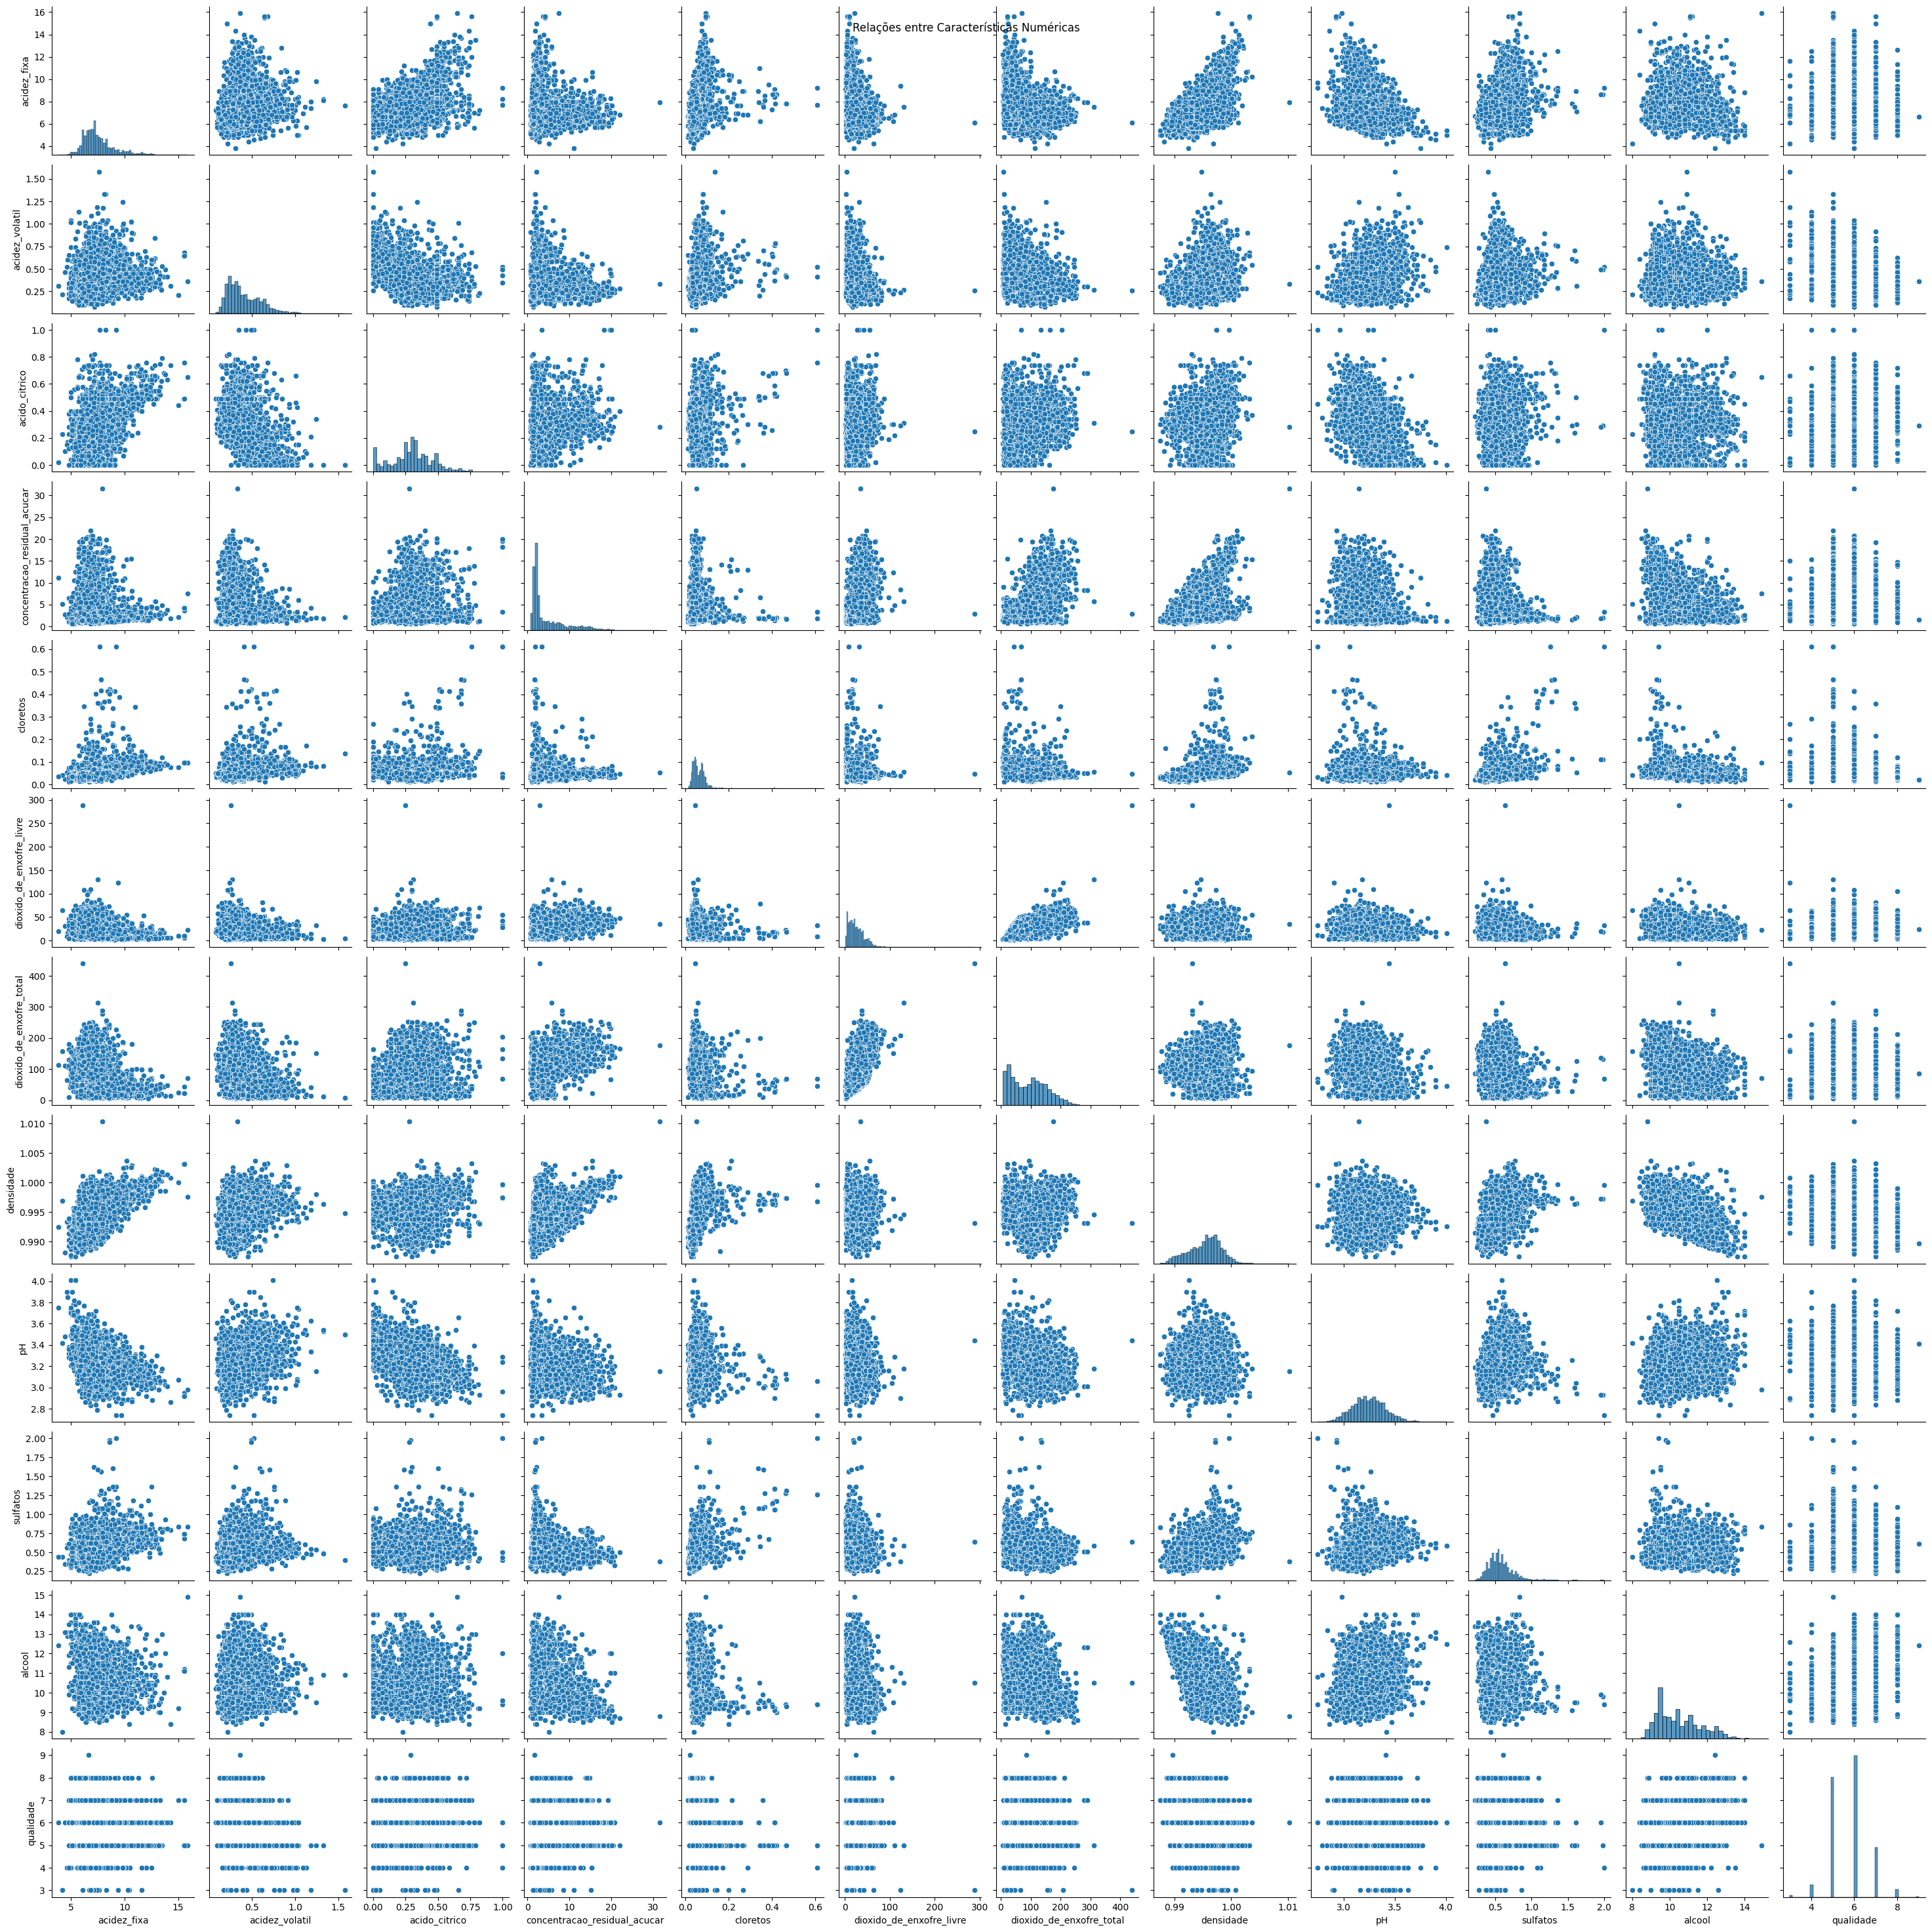

In [165]:
sns.pairplot(data=numeric_features)
plt.suptitle("Relações entre Características Numéricas")
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


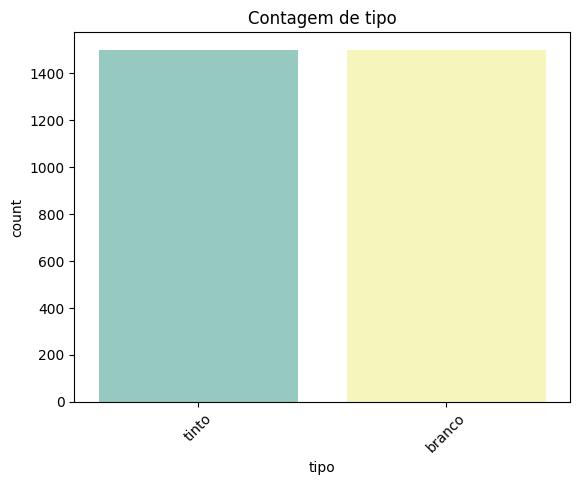

In [ ]:
# Visualize a contagem das características categóricas usando gráficos de barras
categorical_features = data.select_dtypes(exclude=[np.number])
for column in categorical_features.columns:
    #if isinstance(data[column].dtype, pd.CategoricalDtype):
        sns.countplot(x=column, data=data, palette="Set3")
        plt.title(f"Contagem de {column}")
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
# 3. Preparação dos dados
# Escolha uma das atividades de classificação (a ou b) e prepare os dados de acordo.

# a. Classificação de vinho do tipo 'tinto' ou 'branco'
# Selecione as features relevantes e os rótulos (tinto ou branco).

#4. Separação dos conjuntos de treino e teste;



In [ ]:
y_tipo = data['tipo']  
print(y_tipo)

0        tinto
1        tinto
2        tinto
3        tinto
4        tinto
         ...  
2995    branco
2996    branco
2997    branco
2998    branco
2999    branco
Name: tipo, Length: 3000, dtype: object


In [ ]:
label_encoder = LabelEncoder()
print(label_encoder)
y_tipo = label_encoder.fit_transform(y_tipo)
print(y_tipo)

LabelEncoder()
[1 1 1 ... 0 0 0]


In [ ]:
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X, y_tipo, test_size=0.2, random_state=42)


In [ ]:
print(X_train_type.head()) 

      acidez_fixa  acidez_volatil  acido_citrico  \
642           7.5            0.57           0.02   
700           6.7            0.64           0.23   
226           6.7            0.46           0.24   
1697          7.5            0.41           0.23   
1010          7.0            0.65           0.02   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
642                            2.6     0.077                      11.0   
700                            2.1     0.080                      11.0   
226                            1.7     0.077                      18.0   
1697                          14.8     0.054                      28.0   
1010                           2.1     0.066                       8.0   

      dioxido_de_enxofre_total  densidade    pH  sulfatos  alcool  qualidade  
642                       35.0    0.99557  3.36      0.62    10.8          6  
700                      119.0    0.99538  3.36      0.70    10.9          5  
226  

In [ ]:
print(X_test_type.head()) 

      acidez_fixa  acidez_volatil  acido_citrico  \
1801          7.0            0.23           0.35   
1190          5.6            0.66           0.00   
1817          5.1            0.30           0.30   
251          11.9            0.57           0.50   
2505          6.4            0.50           0.20   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
1801                           1.4     0.036                      31.0   
1190                           2.2     0.087                       3.0   
1817                           2.3     0.048                      40.0   
251                            2.6     0.082                       6.0   
2505                           2.4     0.059                      19.0   

      dioxido_de_enxofre_total  densidade    pH  sulfatos  alcool  qualidade  
1801                     113.0    0.99120  3.16      0.48    10.8          7  
1190                      11.0    0.99378  3.71      0.63    12.8          7  
1817 

In [ ]:
print(y_train_type) 

[1 1 1 ... 1 1 1]


In [ ]:
print(y_test_type)

[0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
X = data.drop(columns=['qualidade'])  # Features
print(X)

      acidez_fixa  acidez_volatil  acido_citrico  \
0             8.9           0.745           0.18   
1             7.5           0.520           0.42   
2             8.3           0.300           0.49   
3             7.8           0.910           0.07   
4             7.2           0.340           0.32   
...           ...             ...            ...   
2995          6.6           0.310           0.07   
2996          6.2           0.240           0.27   
2997          5.1           0.350           0.26   
2998          8.0           0.450           0.28   
2999          7.4           0.105           0.34   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
0                              2.5     0.077                      15.0   
1                              2.3     0.087                       8.0   
2                              3.8     0.090                      11.0   
3                              1.9     0.058                      22.0   
4    

In [ ]:
y_quality = data['qualidade']  # Rótulos para a classificação de qualidade (superior ou inferior a 6)
print(y_quality)


0       6
1       6
2       7
3       6
4       5
       ..
2995    5
2996    6
2997    6
2998    7
2999    6
Name: qualidade, Length: 3000, dtype: int64


In [ ]:
y_quality = (y_quality > 6).astype(int)
print(y_quality)


0       0
1       0
2       1
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    1
2999    0
Name: qualidade, Length: 3000, dtype: int32


In [ ]:
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y_quality, test_size=0.2, random_state=42)


In [ ]:
print(X_train_quality)

      acidez_fixa  acidez_volatil  acido_citrico  \
642           7.5            0.57           0.02   
700           6.7            0.64           0.23   
226           6.7            0.46           0.24   
1697          7.5            0.41           0.23   
1010          7.0            0.65           0.02   
...           ...             ...            ...   
1638          6.3            0.34           0.29   
1095         10.1            0.27           0.54   
1130         11.5            0.59           0.59   
1294          7.1            0.36           0.30   
860           7.1            0.71           0.00   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
642                            2.6     0.077                      11.0   
700                            2.1     0.080                      11.0   
226                            1.7     0.077                      18.0   
1697                          14.8     0.054                      28.0   
1010 

In [ ]:
print(X_test_quality)

      acidez_fixa  acidez_volatil  acido_citrico  \
1801          7.0            0.23           0.35   
1190          5.6            0.66           0.00   
1817          5.1            0.30           0.30   
251          11.9            0.57           0.50   
2505          6.4            0.50           0.20   
...           ...             ...            ...   
104           9.5            0.59           0.44   
2087          6.2            0.28           0.27   
599           9.5            0.46           0.24   
1756          7.6            0.14           0.74   
1323          9.9            0.35           0.41   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
1801                           1.4     0.036                      31.0   
1190                           2.2     0.087                       3.0   
1817                           2.3     0.048                      40.0   
251                            2.6     0.082                       6.0   
2505 

In [ ]:
print(y_train_quality)

642     0
700     0
226     0
1697    0
1010    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: qualidade, Length: 2400, dtype: int32


In [ ]:
print(y_test_quality)

1801    1
1190    1
1817    0
251     0
2505    0
       ..
104     0
2087    0
599     0
1756    1
1323    0
Name: qualidade, Length: 600, dtype: int32


In [ ]:
#5. Modelagem, realizar o treinamento de modelos (sugestão: usar SVM);


In [ ]:
svm_model_type = SVC(kernel='linear', random_state=42)

In [ ]:
svm_model_type

SVC(kernel='linear', random_state=42)

In [ ]:
svm_model_type.fit(X_train_type, y_train_type)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_type = svm_model_type.predict(X_test_type)
print(y_pred_type)

[0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
accuracy_type = accuracy_score(y_test_type, y_pred_type)
print(f'Acurácia do modelo de classificação de tipo: {accuracy_type:.2f}')

Acurácia do modelo de classificação de tipo: 0.98


In [178]:
X = data.drop(['qualidade'], axis=1)

In [179]:
y = data['qualidade']

In [182]:
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train_quality)

      acidez_fixa  acidez_volatil  acido_citrico  \
642           7.5            0.57           0.02   
700           6.7            0.64           0.23   
226           6.7            0.46           0.24   
1697          7.5            0.41           0.23   
1010          7.0            0.65           0.02   
...           ...             ...            ...   
1638          6.3            0.34           0.29   
1095         10.1            0.27           0.54   
1130         11.5            0.59           0.59   
1294          7.1            0.36           0.30   
860           7.1            0.71           0.00   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
642                            2.6     0.077                      11.0   
700                            2.1     0.080                      11.0   
226                            1.7     0.077                      18.0   
1697                          14.8     0.054                      28.0   
1010 

In [186]:
X_train_encoded = pd.get_dummies(X_train_quality, columns=['tipo'])
print(X_train_encoded)

      acidez_fixa  acidez_volatil  acido_citrico  \
642           7.5            0.57           0.02   
700           6.7            0.64           0.23   
226           6.7            0.46           0.24   
1697          7.5            0.41           0.23   
1010          7.0            0.65           0.02   
...           ...             ...            ...   
1638          6.3            0.34           0.29   
1095         10.1            0.27           0.54   
1130         11.5            0.59           0.59   
1294          7.1            0.36           0.30   
860           7.1            0.71           0.00   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
642                            2.6     0.077                      11.0   
700                            2.1     0.080                      11.0   
226                            1.7     0.077                      18.0   
1697                          14.8     0.054                      28.0   
1010 

In [198]:
X_test_encoded = pd.get_dummies(X_test_quality, columns=['tipo'])

In [196]:
svm_model_quality = SVC(kernel='linear', random_state=42)


In [201]:
svm_model_quality.fit(X_train_encoded, y_train_quality)

SVC(kernel='linear', random_state=42)

In [202]:
y_pred_quality = svm_model_quality.predict(X_test_encoded)
print(y_pred_quality)

[6 6 6 6 5 6 5 6 5 6 5 6 5 6 5 5 5 6 6 5 6 6 5 6 6 5 6 5 5 5 5 6 5 6 5 6 5
 6 6 5 6 6 6 6 6 6 6 5 6 6 5 6 5 5 6 5 5 6 5 5 6 5 5 6 5 5 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 5 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 6 5 6 6 5 6 6 5 5 6 6 5 5 6
 5 5 6 5 6 5 6 6 6 6 5 5 6 6 5 6 5 6 5 5 6 5 6 6 6 6 6 5 5 6 6 5 6 6 5 5 5
 6 6 6 6 6 6 5 5 5 6 5 5 6 5 6 6 5 5 6 6 6 6 5 5 5 5 6 5 6 6 6 6 6 5 5 6 6
 5 6 6 6 5 6 6 6 5 6 6 5 6 5 6 6 6 5 5 6 6 6 5 5 5 5 6 5 6 5 5 6 6 5 6 6 6
 5 6 6 5 5 6 6 6 6 6 6 6 5 6 6 6 6 6 5 5 5 6 6 5 6 5 5 6 6 5 5 6 6 5 6 6 6
 5 6 6 6 6 5 5 5 6 5 5 5 5 6 5 5 5 5 5 6 5 5 6 6 6 5 6 5 5 6 5 5 6 5 5 6 6
 5 6 5 5 5 6 6 6 6 6 6 5 5 5 5 6 5 6 5 5 6 5 6 5 5 5 6 5 6 5 5 6 5 6 6 5 6
 5 6 6 5 6 6 6 6 6 5 5 6 6 6 5 6 6 6 6 6 6 5 6 6 6 5 5 6 6 6 5 6 5 6 6 6 6
 5 6 6 6 5 5 5 5 5 6 5 6 5 6 6 6 6 5 5 5 6 5 5 6 5 5 5 6 5 6 5 6 6 6 6 5 6
 6 6 6 5 5 5 5 6 6 5 6 5 6 5 6 6 6 5 6 6 5 6 6 6 5 5 5 6 5 6 5 6 5 5 6 6 6
 5 5 5 5 5 5 6 5 6 6 5 5 5 6 6 6 5 5 5 5 6 6 6 6 6 6 6 6 6 5 6 5 6 6 5 5 6
 6 6 5 6 6 5 5 5 5 6 6 6 

In [203]:
accuracy_quality = accuracy_score(y_test_quality, y_pred_quality)
print(f'Acurácia do modelo de classificação de qualidade: {accuracy_quality:.2f}')


Acurácia do modelo de classificação de qualidade: 0.57


In [84]:
#6. Avaliar o resultado dos modelos, identificando o modelo com melhor desempenho.

In [86]:
accuracy_type = accuracy_score(y_test_type, y_pred_type)
print(accuracy_type)

0.9783333333333334


In [208]:
confusion_matrix_type = confusion_matrix(y_test_type, y_pred_type)
print(confusion_matrix_type)

[[281   6]
 [  7 306]]


In [88]:
classification_report_type = classification_report(y_test_type, y_pred_type)
print(classification_report_type)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       287
           1       0.98      0.98      0.98       313

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [90]:
print("Avaliação do Modelo de Classificação de Tipo (Atividade A):")
print(f'Acurácia: {accuracy_type:.2f}')
print("Matriz de Confusão:")
print(confusion_matrix_type)
print("Relatório de Classificação:")
print(classification_report_type)

Avaliação do Modelo de Classificação de Tipo (Atividade A):
Acurácia: 0.98
Matriz de Confusão:
[[281   6]
 [  7 306]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       287
           1       0.98      0.98      0.98       313

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [204]:
# Avaliar o modelo de classificação de qualidade (Atividade B)

In [206]:
accuracy_quality = accuracy_score(y_test_quality, y_pred_quality)
print(accuracy_quality)

0.5716666666666667


In [209]:
confusion_matrix_quality = confusion_matrix(y_test_quality, y_pred_quality)
print(confusion_matrix_quality)

[[  0   0   3   2   0   0]
 [  0   0  15   6   0   0]
 [  0   0 165  59   0   0]
 [  0   0  79 178   0   0]
 [  0   0   5  72   0   0]
 [  0   0   1  15   0   0]]


In [211]:
classification_report_quality = classification_report(y_test_quality, y_pred_quality)
print(classification_report_quality)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        21
           5       0.62      0.74      0.67       224
           6       0.54      0.69      0.60       257
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00        16

    accuracy                           0.57       600
   macro avg       0.19      0.24      0.21       600
weighted avg       0.46      0.57      0.51       600



c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [212]:
print("\nAvaliação do Modelo de Classificação de Qualidade (Atividade B):")
print(f'Acurácia: {accuracy_quality:.2f}')
print("Matriz de Confusão:")
print(confusion_matrix_quality)
print("Relatório de Classificação:")
print(classification_report_quality)


Avaliação do Modelo de Classificação de Qualidade (Atividade B):
Acurácia: 0.57
Matriz de Confusão:
[[  0   0   3   2   0   0]
 [  0   0  15   6   0   0]
 [  0   0 165  59   0   0]
 [  0   0  79 178   0   0]
 [  0   0   5  72   0   0]
 [  0   0   1  15   0   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        21
           5       0.62      0.74      0.67       224
           6       0.54      0.69      0.60       257
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00        16

    accuracy                           0.57       600
   macro avg       0.19      0.24      0.21       600
weighted avg       0.46      0.57      0.51       600



In [213]:
# Identificar o modelo com melhor desempenho

In [215]:
if accuracy_type > accuracy_quality:
    print("\nO Modelo de Classificação de Tipo (Atividade A) possui melhor desempenho.")
else:
    print("\nO Modelo de Classificação de Qualidade (Atividade B) possui melhor desempenho.")


O Modelo de Classificação de Tipo (Atividade A) possui melhor desempenho.
